In [27]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [28]:
import numpy as np
import pandas as pd

def load_images(filename, num):
    images = pd.read_csv(filename)
    return (images.iloc[:num, 1:].values.astype(np.uint8),
            images.iloc[:num, 0].values.astype(np.uint8))

X_train, y_train = load_images('train.csv', 6000)
X_test, y_test = load_images('test.csv', 400)


### Visualization

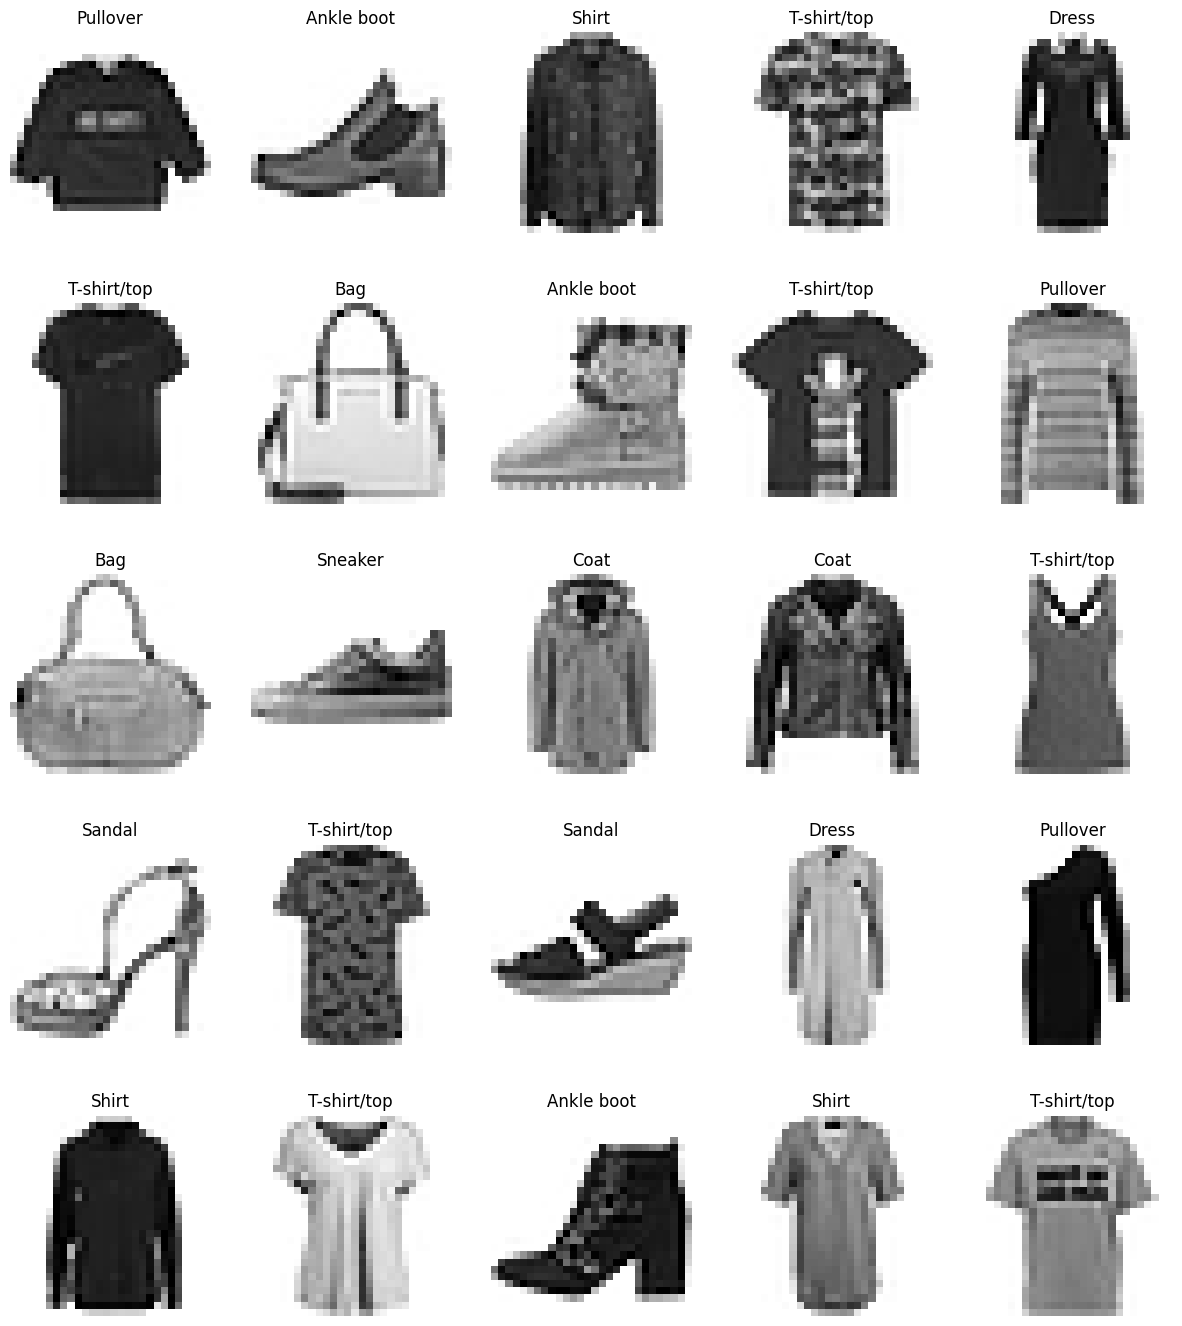

In [29]:
import matplotlib.pyplot as plt

classes = ['T-shirt/top', 'Trouser', 'Pullover',
           'Dress', 'Coat', 'Sandal', 'Shirt',
           'Sneaker', 'Bag', 'Ankle boot']

fig, ax = plt.subplots(5, 5, figsize=(15, 17))

for i in range(5):
    for j in range(5):
        image = X_train[i*10 + j]
        label = y_train[i*10 + j]
        ax[i][j].imshow(image.reshape(28, 28),
                        cmap='binary')
        ax[i][j].set_title(classes[label])
        ax[i][j].axis('off')

plt.show()

### Models

In [30]:
# Créer les modèles
model1 = KNeighborsClassifier()
model2 = DecisionTreeClassifier()
model3 = OneVsRestClassifier(DecisionTreeClassifier())



- - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - 
KNeighborsClassifier
Performance Indicators on Test Set: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 0.81 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 0.8 
- - - - - - - - - - - - - - - - - - - - - - - - - 

- - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - 
DecisionTreeClassifier
Performance Indicators on Test Set: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 0.75 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 0.75 
- - - - - - - - - - - - - - - - - - - - - - - - - 

- - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - 
OneVsRestClassifier
Performance Indicators on Test Set: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 0.76 
- - - - - - - - - - - - - - - - - - - - - - - - - 


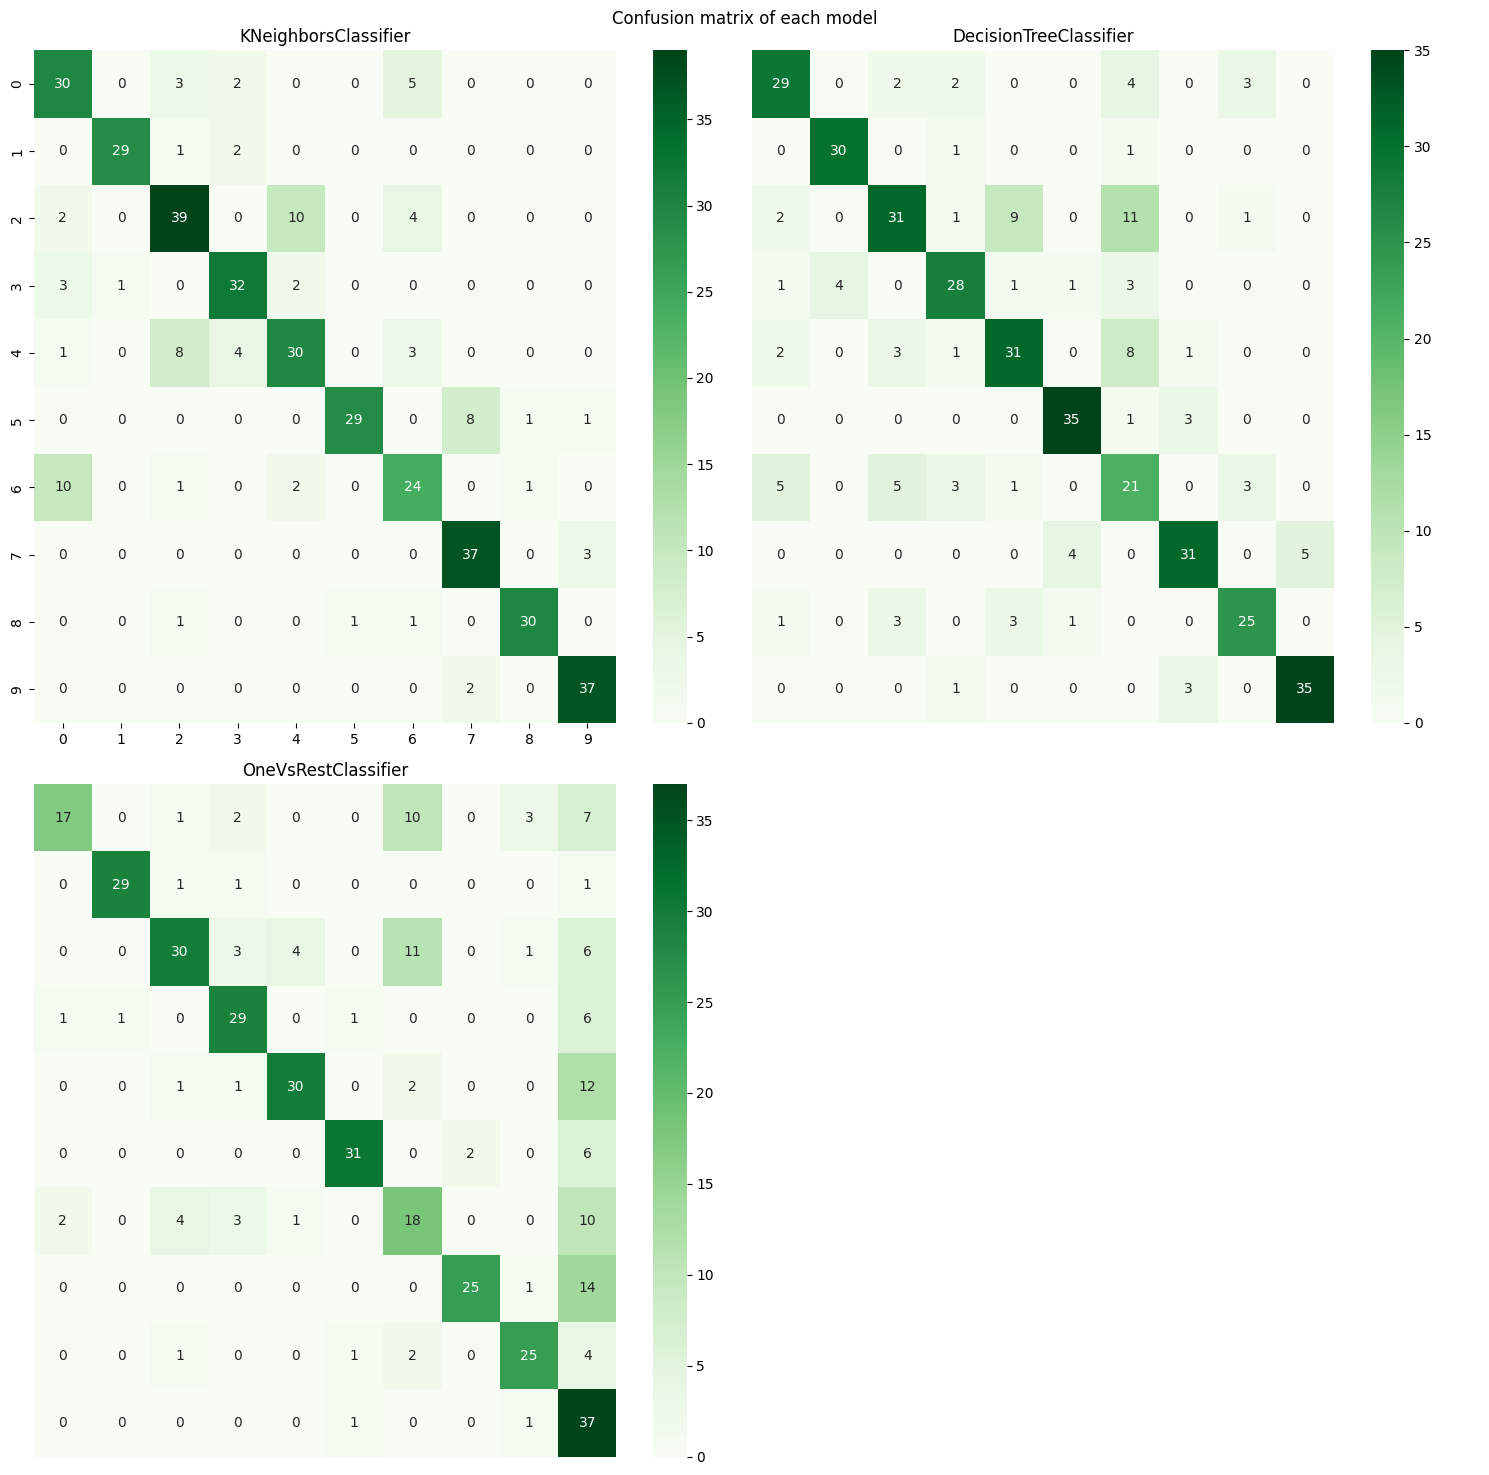

In [31]:
line = f"\n{25*'- '}"
performance = {}
x = 0
y = 0
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for model in (model1, model2, model3):
    model.fit(X_train, y_train)
    print(2*line)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    print(model.__class__.__name__)
    print("Performance Indicators on Test Set:", line)
    print("Precision Score:", round(precision,2), line)
    print("Recall Score:", round(recall,2), line)
    sns.heatmap(pd.DataFrame(
        confusion_matrix(y_test, y_pred)), cmap="Greens", annot=True, fmt=".0f", ax=axs[x, y])
    axs[x, y].set_title(model.__class__.__name__)
    y += 1
    if y == 2:
        x = 1
        y = 0
    performance[model.__class__.__name__] = [precision, recall]
    axs[x, y].axis('off')
axs[1, 1].axis('off')
fig.suptitle('Confusion matrix of each model')
plt.tight_layout()
plt.savefig('CM.png')
plt.show()


In [32]:
performance

{'KNeighborsClassifier': [0.8078996200390851, 0.8017597634059305],
 'DecisionTreeClassifier': [0.7511813480208576, 0.7516970643772705],
 'OneVsRestClassifier': [0.7628843148454962, 0.6891886064926683]}

### Créer le BaggingClassifier combinant les modèles


/home/triomphant/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier
Performance Indicators on Test Set: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 0.82 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 0.82 
- - - - - - - - - - - - - - - - - - - - - - - - - 


/home/triomphant/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier
Performance Indicators on Test Set: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 0.82 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 0.83 
- - - - - - - - - - - - - - - - - - - - - - - - - 


/home/triomphant/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/triomphant/.local/lib/python3.10/site-packages/sklearn/multiclass.py:492: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]
/home/triomphant/.local/lib/python3.10/site-packages/sklearn/multiclass.py:492: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]
/home/triomphant/.local/lib/python3.10/site-packages/sklearn/multiclass.py:492: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]
/home/triomphant/.local/lib/python3.10/site-packages/sklearn/multiclass.py:492: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]
/home/triomphant/.local/lib/python3.10/site-packages/sklearn/multiclass.py:492: RuntimeWarning: invalid value

BaggingClassifier
Performance Indicators on Test Set: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 0.85 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 0.48 
- - - - - - - - - - - - - - - - - - - - - - - - - 


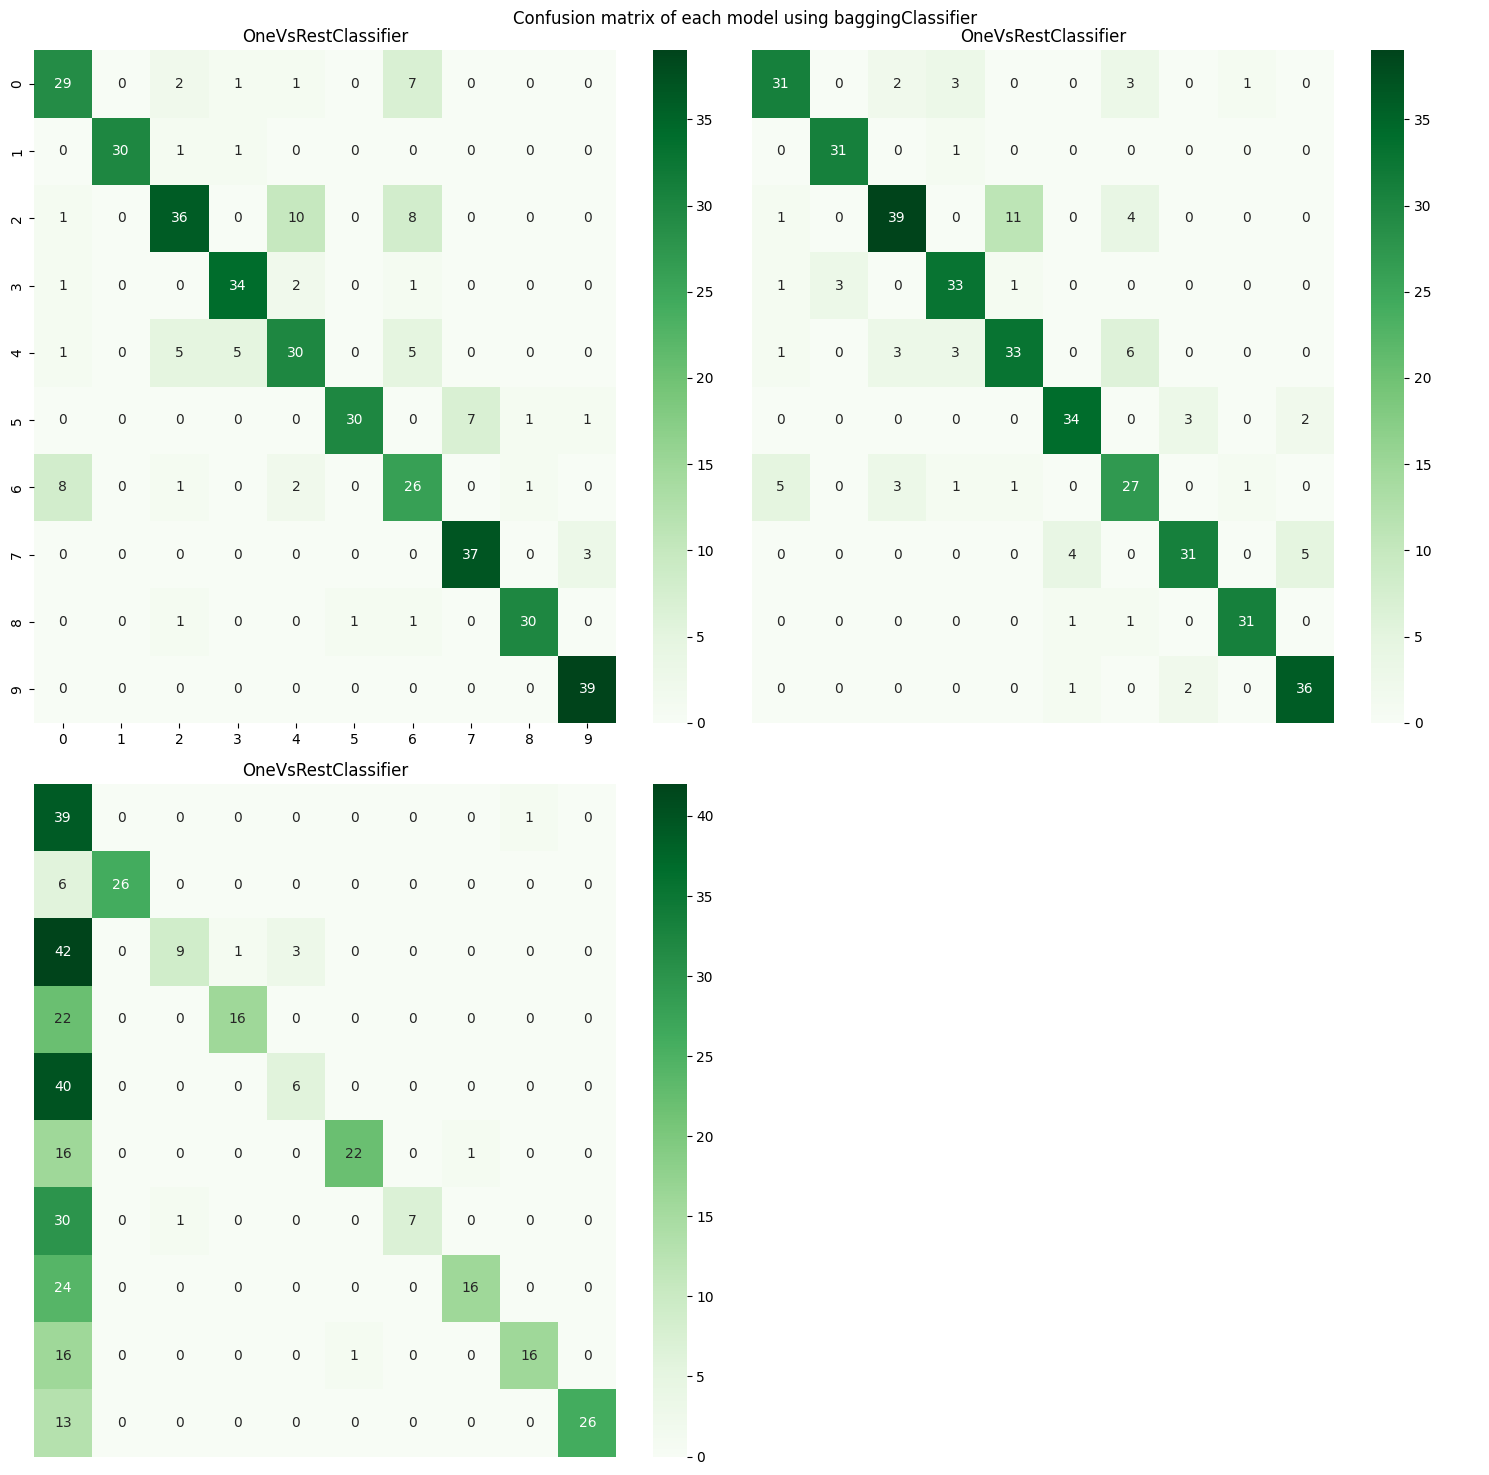

In [33]:
performancebagg = {}
line = f"\n{25*'- '}"
x = 0
y = 0
fig1, axs = plt.subplots(2, 2, figsize=(15, 15))

for model1 in (model1, model2, model3):
    bagging = BaggingClassifier(
        base_estimator=model1, n_estimators=10)
    # Entraîner le modèle
    bagging.fit(X_train, y_train)
    # Prédiction
    y_pred_bag = bagging.predict(X_test)
    precision_bag = precision_score(y_test, y_pred_bag, average='macro')
    recall_bag = recall_score(y_test, y_pred_bag, average='macro')
    print(bagging.__class__.__name__)
    print("Performance Indicators on Test Set:", line)
    print("Precision Score:", round(precision_bag, 2), line)
    print("Recall Score:", round(recall_bag, 2), line)
    sns.heatmap(pd.DataFrame(
        confusion_matrix(y_test, y_pred_bag)), cmap="Greens", annot=True, fmt=".0f", ax=axs[x, y])
    axs[x, y].set_title(model.__class__.__name__)
    y += 1
    if y == 2:
        x = 1
        y = 0
    axs[x, y].axis('off')
    performancebagg[model1.__class__.__name__] = [precision_bag, recall_bag]
axs[1, 1].axis('off')
fig1.suptitle('Confusion matrix of each model using baggingClassifier')
plt.tight_layout()
plt.savefig('CMbag.png')
plt.show()

In [34]:
performancebagg

{'KNeighborsClassifier': [0.8198338092247444, 0.8151488414331662],
 'DecisionTreeClassifier': [0.8204944026121501, 0.8258445316125522],
 'OneVsRestClassifier': [0.8503975882077937, 0.48024520197575127]}

### Combinaison and hyper-parameters

In [35]:
# Définir une grille de paramètres pour le KNN
knn_param_grid = {'n_neighbors': [3, 5, 7, 11]}

# Définir une grille de paramètres pour l'arbre de décision
dt_param_grid = {'max_depth': [3, 5, 7, 11]}

# Définir une grille de paramètres pour le classificateur OvR
ovr_param_grid = {'estimator__max_depth': [3, 5, 7, 11]}

# Effectuer une recherche de grille pour chaque modèle
knn_gs = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv = 5)
dt_gs = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5)
ovr_gs = GridSearchCV(OneVsRestClassifier(
    DecisionTreeClassifier()), ovr_param_grid, cv=5)
DecisionTreeClassifier
# Adapter chaque modèle avec les meilleurs paramètres trouvés
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_

dt_gs.fit(X_train, y_train)
dt_best = dt_gs.best_estimator_

ovr_gs.fit(X_train, y_train)
ovr_best = ovr_gs.best_estimator_

# Créer une liste des meilleurs modèles
best_estimators = [('knn', knn_best), ('dt', dt_best), ('ovr', ovr_best)]

In [36]:
for i in best_estimators:
    print(f'{i[0]} : {i[1]}')


knn : KNeighborsClassifier()
dt : DecisionTreeClassifier(max_depth=11)
ovr : OneVsRestClassifier(estimator=DecisionTreeClassifier(max_depth=5))


/home/triomphant/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier
Performance Indicators on Test Set: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 0.81 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 0.8 
- - - - - - - - - - - - - - - - - - - - - - - - - 


/home/triomphant/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier
Performance Indicators on Test Set: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 0.77 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 0.77 
- - - - - - - - - - - - - - - - - - - - - - - - - 


/home/triomphant/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier
Performance Indicators on Test Set: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 0.79 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Recall Score: 0.77 
- - - - - - - - - - - - - - - - - - - - - - - - - 


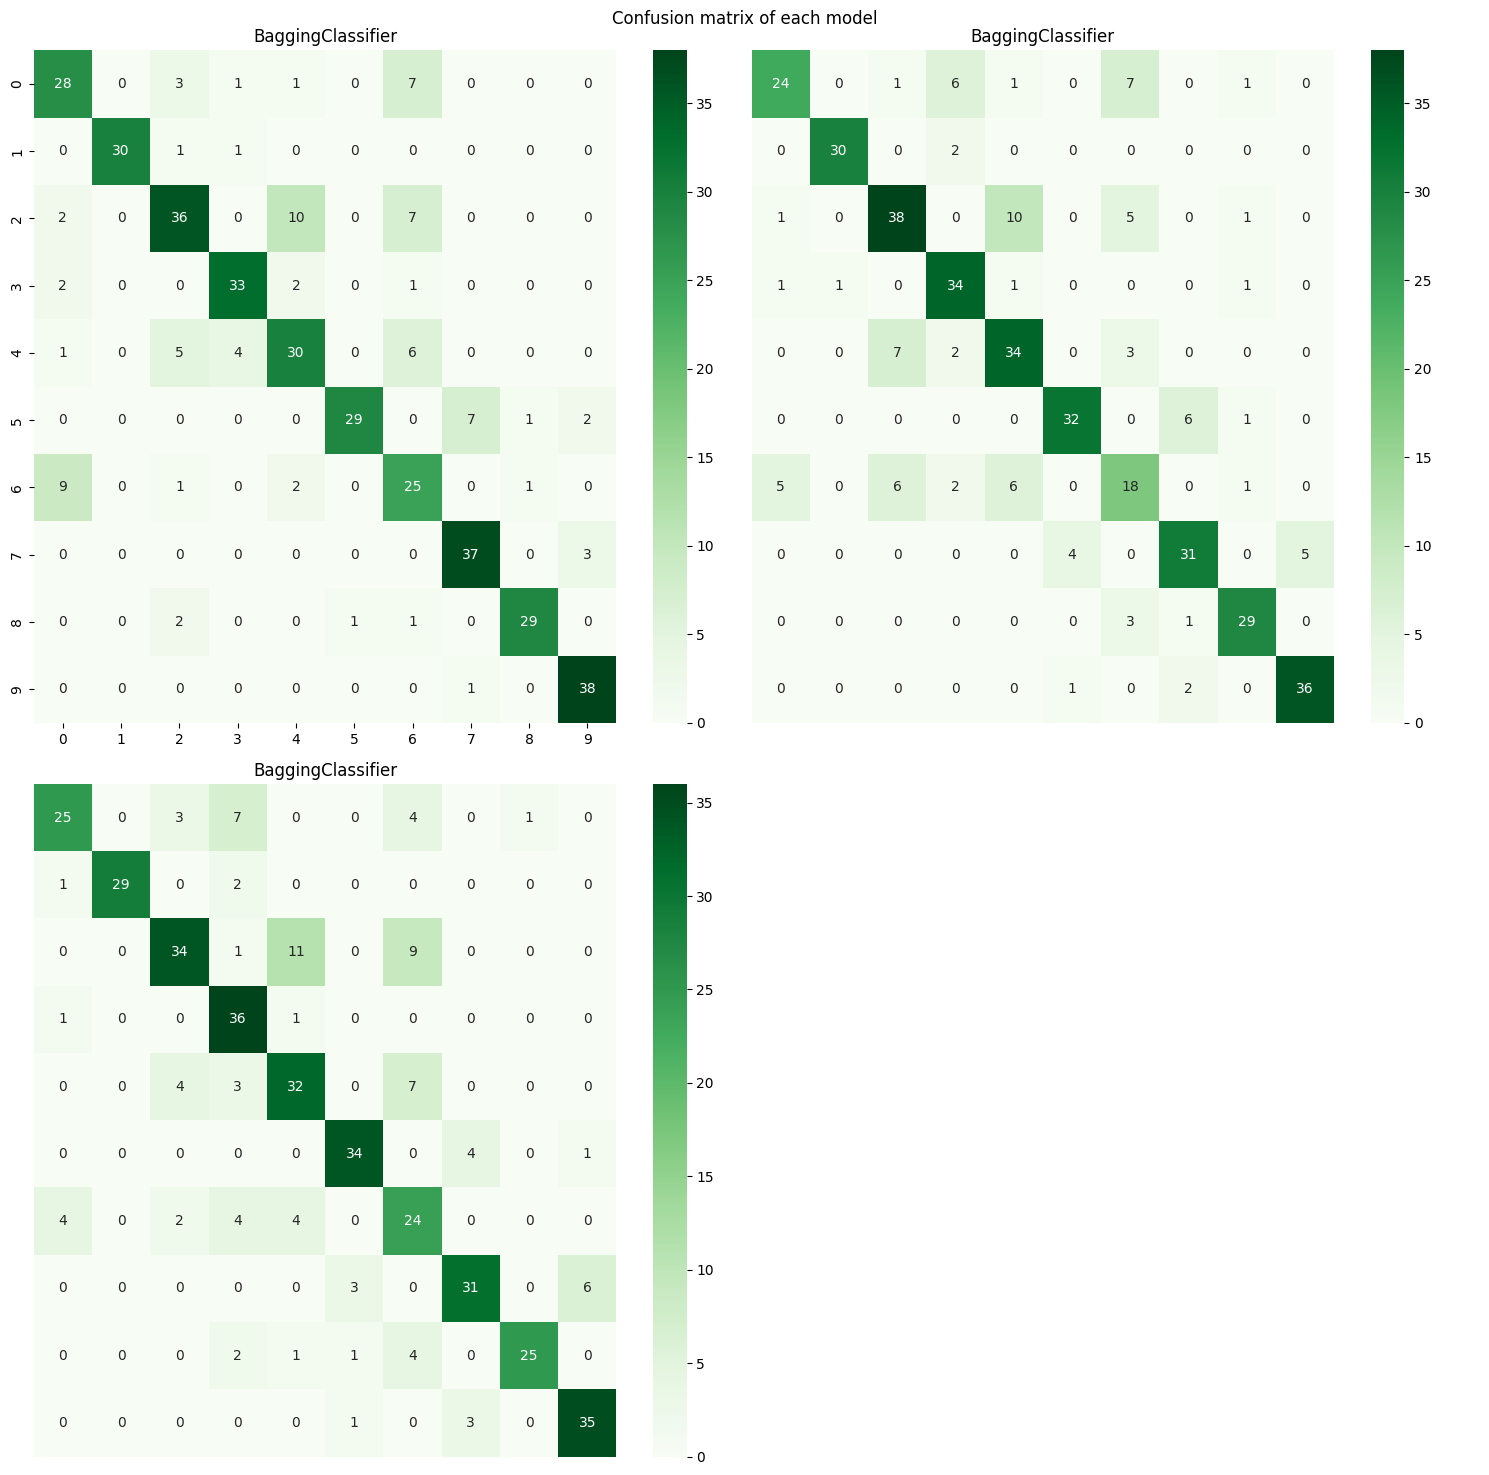

In [37]:
performancebaggBest = {}
line = f"\n{25*'- '}"
count = 0
x = 0
y = 0
fig1, axs = plt.subplots(2, 2, figsize=(15, 15))

for best_estimator in best_estimators:
    # Créer le bagging classifier avec les meilleurs modèles
    bagging_best = BaggingClassifier(base_estimator=best_estimator[1], n_estimators=10)

    # Adapter le modèle avec les données d'entraînement
    bagging_best.fit(X_train, y_train)

    # Faire des prédictions sur les données de test
    y_pred = bagging_best.predict(X_test)
    precision_bag = precision_score(y_test, y_pred, average='macro')
    recall_bag = recall_score(y_test, y_pred, average='macro')
    print(bagging_best.__class__.__name__)
    print("Performance Indicators on Test Set:", line)
    print("Precision Score:", round(precision_bag, 2), line)
    print("Recall Score:", round(recall_bag, 2), line)
    sns.heatmap(pd.DataFrame(
        confusion_matrix(y_test, y_pred)), cmap="Greens", annot=True, fmt=".0f", ax=axs[x, y])
    axs[x, y].set_title(bagging_best.__class__.__name__)
    y += 1
    if y == 2:
        x = 1
        y = 0
    type = ["KNeighborsClassifier",
            "DecisionTreeClassifier", "OneVsRestClassifier"]
    performancebaggBest[type[count]] = [
        precision_bag, recall_bag]
    count += 1
    axs[x, y].axis('off')
fig1.suptitle('Confusion matrix of each model')
plt.tight_layout()
plt.savefig('CM_bag_best.png')
plt.show()


In [38]:
print('Performance without bagging', line)
print(performance, line)
print('Performance with bagging', line)
print(performancebagg, line)
print('Performance with best hyper parameter of bagging', line)
print(performancebaggBest, line)


Performance without bagging 
- - - - - - - - - - - - - - - - - - - - - - - - - 
{'KNeighborsClassifier': [0.8078996200390851, 0.8017597634059305], 'DecisionTreeClassifier': [0.7511813480208576, 0.7516970643772705], 'OneVsRestClassifier': [0.7628843148454962, 0.6891886064926683]} 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Performance with bagging 
- - - - - - - - - - - - - - - - - - - - - - - - - 
{'KNeighborsClassifier': [0.8198338092247444, 0.8151488414331662], 'DecisionTreeClassifier': [0.8204944026121501, 0.8258445316125522], 'OneVsRestClassifier': [0.8503975882077937, 0.48024520197575127]} 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Performance with best hyper parameter of bagging 
- - - - - - - - - - - - - - - - - - - - - - - - - 
{'KNeighborsClassifier': [0.806949576319339, 0.7992271753799214], 'DecisionTreeClassifier': [0.7736536125092218, 0.7733338200700901], 'OneVsRestClassifier': [0.7887212106707957, 0.7725837887322442]} 
- - - - - - - - - - - - - - - - - - -

### With RandomForestClassifier

In [39]:
rfc_model = RandomForestClassifier(n_estimators=100)

In [40]:
rfc_model.fit(X_train, y_train)
y_pred_rf = rfc_model.predict(X_test)

In [41]:
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')


Performance Indicators on Test Set: 
- - - - - - - - - - - - - - - - - - - - - - - - - 
Precision Score: 0.83
Recall Score: 0.84


(0.0, 10.0, 10.0, 0.0)

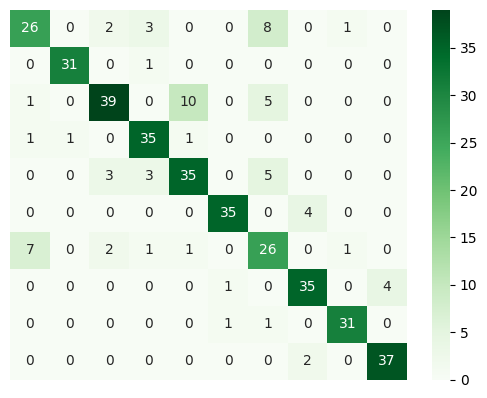

In [42]:
print("Performance Indicators on Test Set:", line)
print("Precision Score:", round(precision, 2))
print("Recall Score:", round(recall, 2))
sns.heatmap(pd.DataFrame(
    confusion_matrix(y_test, y_pred_rf)), cmap="Greens", annot=True, fmt=".0f")
plt.axis('off')

#### Best parameters

In [43]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4]
}


In [44]:
# Instantiate a RandomForestClassifier object
rf = RandomForestClassifier()

In [45]:
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [50, 100, 200, 400]})

In [46]:
# Print the best hyperparameters found
print("Best hyperparameters:", rf_cv.best_params_)
y_best_rf = rf_cv.predict(X_test)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


### Performance

In [47]:
precision = precision_score(y_test, y_best_rf, average='macro')
recall = recall_score(y_test, y_best_rf, average='macro')


Precision Score: 0.84
Recall Score: 0.84


(0.0, 10.0, 10.0, 0.0)

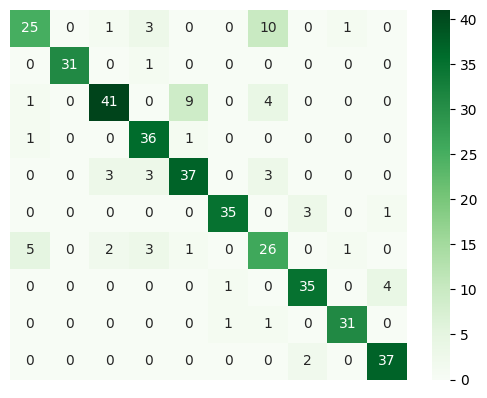

In [48]:
precision = precision_score(y_test, y_best_rf, average='macro')
recall = recall_score(y_test, y_best_rf, average='macro')
print("Precision Score:", round(precision, 2))
print("Recall Score:", round(recall, 2))
sns.heatmap(pd.DataFrame(
    confusion_matrix(y_test, y_best_rf)), cmap="Greens", annot=True, fmt=".0f")
plt.axis('off')
